<a href="https://colab.research.google.com/github/HestC/DACSS_690a/blob/master/Copy_of_dacss_690a_dbt_project_visualization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                     table_name
0    op_10_customers_by_revenue
1       pg_stat_statements_info
2                 product_check
3            pg_stat_statements
4      customers_lifetime_value
5                            A4
6            orders_by_customer
7          category_performance
8   top_10_customers_by_revenue
9                     customers
10                        sales
11                     products
12                 stg_products
13          product_performance
14                           A2
15          ategory_performance
16                          clv
17                stg_customers
18                           A3
19      customer_lifetime_value
20                    stg_sales
21                           A5
22       monthly_revenue_orders
23          category_performace
24                orders_by_day
25                           A1
26     customer_order_frequency
27             top_10_customers
   order_date  total_revenue  total_orders
0  2024-01-01         924.09 

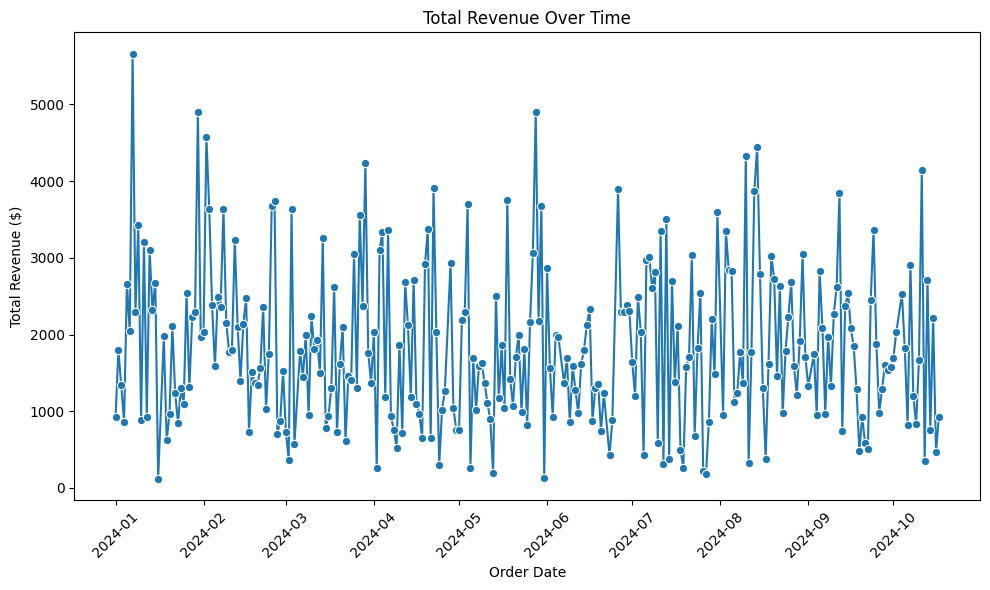

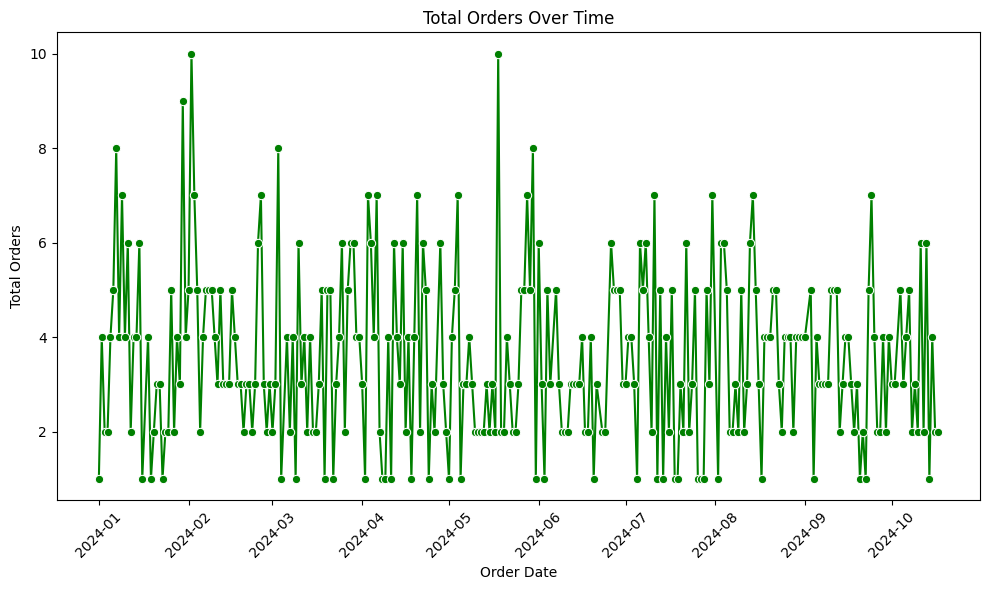

<ipython-input-3-0e0e280966bd>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_data, x='total_revenue', y='product_name', palette='Blues_d')


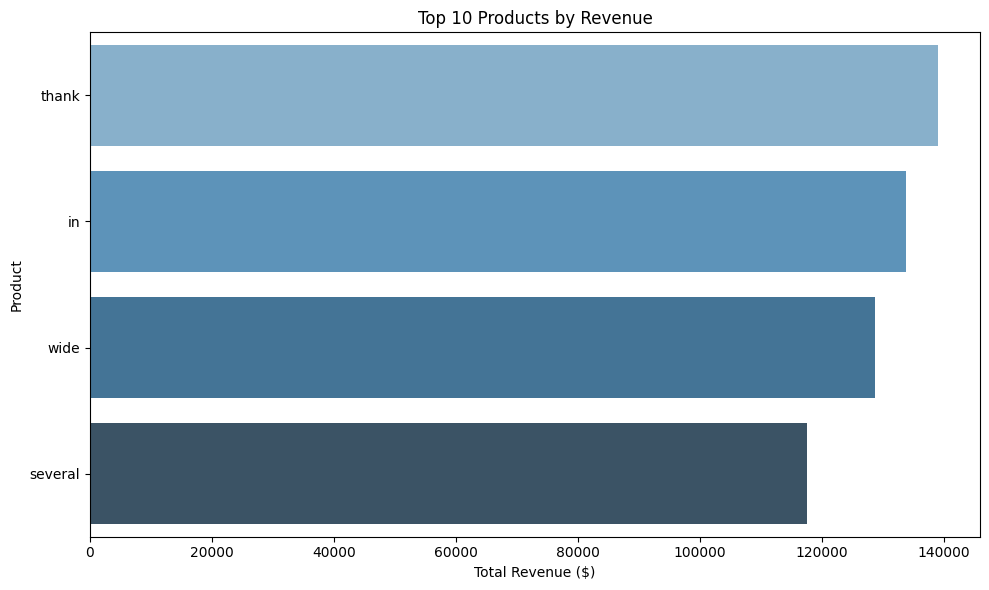

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# PostgreSQL connection string from DBT example
db_connection_url = "postgresql://u5h2s7shhkqeo5:pf373bc6d5cddc47f95a938f4914e895c868ca1e01fc5eeb79ad7413b71c6db40@c97r84s7psuajm.cluster-czrs8kj4isg7.us-east-1.rds.amazonaws.com:5432/d9snqvovhsjpqs"

# Create SQLAlchemy engine
engine = create_engine(db_connection_url)

# Test connection and list the tables
tables = pd.read_sql("SELECT table_name FROM information_schema.tables WHERE table_schema='public'", engine)
print(tables)

# Query sales data
sales_query = '''
SELECT order_date, SUM(total_price) as total_revenue, COUNT(order_id) as total_orders
FROM stg_sales
GROUP BY order_date
ORDER BY order_date;
'''
sales_data = pd.read_sql(sales_query, engine)

# Display the first few rows
print(sales_data.head())

# Plot total revenue over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_data, x='order_date', y='total_revenue', marker='o')
plt.title('Total Revenue Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot total orders over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_data, x='order_date', y='total_orders', marker='o', color='green')
plt.title('Total Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Query top products by revenue
product_query = '''
SELECT p.product_name, SUM(s.total_price) as total_revenue
FROM stg_sales s
JOIN stg_products p ON s.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_revenue DESC
LIMIT 10;
'''
product_data = pd.read_sql(product_query, engine)

# Plot top products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=product_data, x='total_revenue', y='product_name', palette='Blues_d')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()